:# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bintang Fahrunnisa
- **Email:** Bintangfhrns@gmail.com / mc009d5x2461@student.devacademy.id
- **ID Dicoding:** MC009D5X2461

## Menentukan Pertanyaan Bisnis

1. Pada hari apakah orang-orang lebih sering menyewa sepeda? weekend atau weekday?
2. Bagaimana perkembangan jumlah penyewa sepeda dari tahun ke tahun?
3. Apakah cuaca berpengaruh dalam jumlah penyewaan sepeda? Pada cuaca apa penyewaan sepeda mencapai angka tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Data Wrangling

### Gathering Data

Sebelum melakukan pengolahan data, kita akan menyiapkan data yang nantinya akan kita olah. Di sini saya menggunakan file bike sharing dengan dataset penyewaan harian. Nantinya kita akan membuat visualisasi data berdasarkan jumlah sewa harian sepeda

In [39]:
#Path file
day_path = "/content/day.csv"

#Load data
df_day = pd.read_csv(day_path)
df_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [40]:
# Cek apakah ada data kosong missing value
print("Cek data kosong di df_day:")
print(df_day.isnull().sum())


Cek data kosong di df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Ternyata tidak ditemukan adanya data kosong atau missing value yang biasanya dituliskan sebagai nilai NaN

In [41]:
#Mengecek apakah ada duplikasi data
print("Cek duplikasi data di df_day:")
print(df_day.duplicated().sum())

Cek duplikasi data di df_day:
0


Tidak ada duplikasi data pada dataset bikesharing

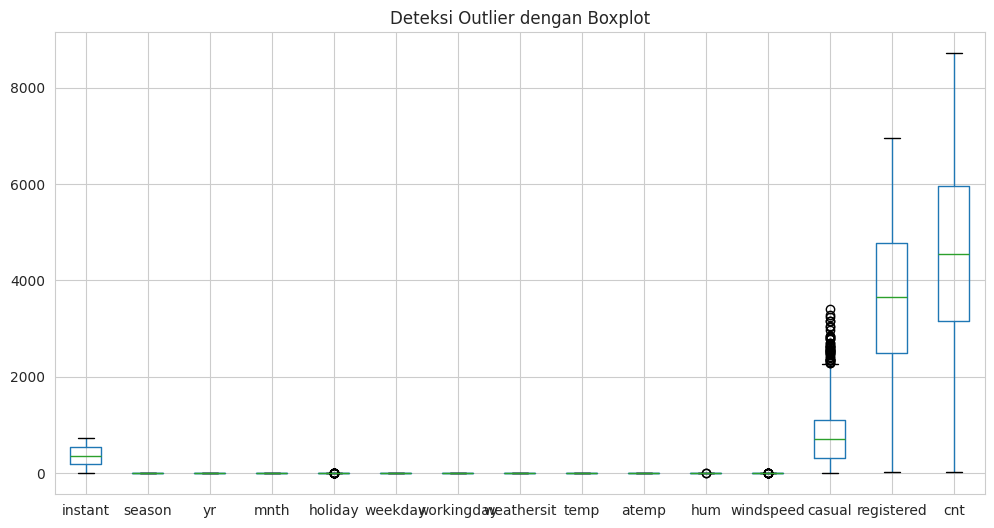

In [42]:
#mendeteksi outlier (nilai ekstrem) dalam kolom numerik dataset menggunakan boxplot :
numerical_features = df_day.select_dtypes(include=['int64', 'float64']).columns
df_day[numerical_features].boxplot(figsize=(12, 6))
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

Kemungkinan terdapat outlier pada kolom casual

In [43]:
#Mencari apakah ada outlier pada data
print("Statistik deskriptif untuk df_day:")
print(df_day.describe())

Statistik deskriptif untuk df_day:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.19

Pada data casual terdapat banyak sekali outlier jika kita lihat pada boxplot. Namun setelah kita lihat lebih dalam, casual adalah orang yang menggunakan layanan peminjaman sepeda dengan frekuensi acak dan tidak rutin. Mereka lebih mungkin terpengaruh oleh faktor-faktor seperti cuaca, waktu luang, dan acara khusus dibandingkan pengguna terdaftar yang mungkin menggunakan sepeda untuk transportasi rutin.

In [44]:
#Menentukan apakah ada invalid value pada data di atas
print("Jumlah nilai unik untuk setiap kolom di df_day:")
print(df_day.nunique())

Jumlah nilai unik untuk setiap kolom di df_day:
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


### Cleaning Data

Setelah data dipastikan bersih dan aman dari outlier maupun anomali lain, kita tidak perlu melakukan cleaning data. Tetapi, kita harus mengubah kolom waktu dteday menjadi datetime untuk mempermudah analisis data waktu peminjaman

In [45]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])


In [46]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [47]:
# Menambahkan kolom nama hari, nama bulan, dan tahun dari 'dteday'
df_day[['weekday', 'mnth', 'yr']] = df_day['dteday'].apply(lambda x: pd.Series([x.strftime('%A'), x.strftime('%B'), x.year]))

# Mengganti nilai pada kolom 'season' dengan nama musim yang relevan
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_mapping)

In [48]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Daftar kolom yang akan dinormalisasi
cols_to_normalize = ['temp', 'atemp', 'hum', 'windspeed']

# Melakukan normalisasi pada kolom yang dipilih
df_day[cols_to_normalize] = scaler.fit_transform(df_day[cols_to_normalize])

# Menampilkan beberapa baris hasil normalisasi
print("Data setelah normalisasi (menampilkan beberapa baris teratas):")
print(df_day[cols_to_normalize].head())


Data setelah normalisasi (menampilkan beberapa baris teratas):
       temp     atemp       hum  windspeed
0  0.355170  0.373517  0.828620   0.284606
1  0.379232  0.360541  0.715771   0.466215
2  0.171000  0.144830  0.449638   0.465740
3  0.175530  0.174649  0.607131   0.284297
4  0.209120  0.197158  0.449313   0.339143


In [49]:
print("\nValidasi rentang data pada kolom kategori...")

# Validasi dan menampilkan data di luar rentang 1-4 untuk 'weathersit'
invalid_weathersit = df_day[~df_day['weathersit'].between(1, 4)]

if not invalid_weathersit.empty:
    print("Data tidak valid pada 'weathersit':\n", invalid_weathersit)

    # Menghapus data yang tidak valid
    df_day = df_day[df_day['weathersit'].between(1, 4)]
    print("\nData tidak valid telah dihapus.")
else:
    print("Tidak ditemukan data tidak valid pada 'weathersit'.")

print("\nProses Data Cleaning telah selesai. Data siap untuk analisis lebih lanjut.")



Validasi rentang data pada kolom kategori...
Tidak ditemukan data tidak valid pada 'weathersit'.

Proses Data Cleaning telah selesai. Data siap untuk analisis lebih lanjut.


In [50]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.355170,0.373517,0.828620,0.284606,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.379232,0.360541,0.715771,0.466215,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.171000,0.144830,0.449638,0.465740,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.175530,0.174649,0.607131,0.284297,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.209120,0.197158,0.449313,0.339143,82,1518,1600


Pada tahap cleaning data, kita telah melakukan beberapa langkah penting untuk memastikan data siap digunakan dalam analisis lebih lanjut. Pertama, kita melakukan transformasi pada beberapa kolom, seperti mengonversi kolom tanggal menjadi informasi hari, bulan, dan tahun yang lebih mudah diinterpretasikan. Selain itu, kita juga mengganti nilai kategori pada kolom season agar lebih informatif dengan nama musim yang sesuai. Selanjutnya, kita melakukan normalisasi pada kolom numerik (temp, atemp, hum, dan windspeed) menggunakan MinMaxScaler untuk memastikan skala data lebih seragam dan mendukung analisis yang lebih akurat. Terakhir, kita melakukan validasi dan pembersihan data dengan memastikan bahwa kolom kategori seperti weathersit hanya memiliki nilai dalam rentang yang valid (1-4), serta menghapus data yang tidak sesuai.

## Exploratory Data Analysis (EDA)

### Explore ...

In [51]:
# Menggabungkan kolom 'holiday' dan 'cnt' untuk menghitung statistik deskriptif
holiday_stats = df_day.groupby('holiday')['cnt'].agg(['max', 'min', 'mean', 'sum']).reset_index()

# Menampilkan hasil statistik
print("Statistik jumlah penyewaan berdasarkan hari libur:")
print(holiday_stats)


Statistik jumlah penyewaan berdasarkan hari libur:
   holiday   max   min         mean      sum
0        0  8714    22  4527.104225  3214244
1        1  7403  1000  3735.000000    78435


Berdasarkan analisis statistik jumlah penyewaan sepeda berdasarkan hari libur, ditemukan bahwa penyewaan sepeda lebih sering terjadi pada hari biasa dibandingkan hari libur, baik dari segi rata-rata maupun total penyewaan. Rata-rata penyewaan pada hari biasa mencapai 4.527 sepeda per hari, lebih tinggi dibandingkan hari libur yang hanya 3.735 sepeda per hari. Selain itu, total penyewaan pada hari biasa jauh lebih besar, yaitu 3.214.244 sepeda, dibandingkan dengan hari libur yang hanya 78.435

In [52]:
# Menghitung statistik jumlah penyewaan berdasarkan kondisi cuaca
weather_stats = df_day.groupby('weathersit')['cnt'].agg(['max', 'min', 'mean', 'sum']).reset_index()

# Menampilkan hasil statistik
print("Statistik jumlah penyewaan berdasarkan kondisi cuaca:")
print(weather_stats)


Statistik jumlah penyewaan berdasarkan kondisi cuaca:
   weathersit   max  min         mean      sum
0           1  8714  431  4876.786177  2257952
1           2  8362  605  4035.862348   996858
2           3  4639   22  1803.285714    37869


In [53]:
# Menghitung statistik jumlah penyewaan berdasarkan musim
season_stats = df_day.groupby('season')['cnt'].agg(['max', 'min', 'mean', 'sum']).reset_index()

# Menampilkan hasil statistik
print("Statistik jumlah penyewaan berdasarkan musim:")
print(season_stats)


Statistik jumlah penyewaan berdasarkan musim:
   season   max   min         mean      sum
0    Fall  8714  1115  5644.303191  1061129
1  Spring  7836   431  2604.132597   471348
2  Summer  8362   795  4992.331522   918589
3  Winter  8555    22  4728.162921   841613


Berdasarkan statistik jumlah penyewaan sepeda berdasarkan musim, terlihat bahwa musim gugur (Fall) memiliki jumlah penyewaan tertinggi dengan rata-rata 5.644 sepeda per hari dan total penyewaan 1.061.129 sepeda, menandakan bahwa periode ini mungkin memiliki kondisi cuaca yang ideal untuk bersepeda. Musim panas (Summer) berada di posisi kedua dengan rata-rata 4.992 sepeda per hari dan total penyewaan 918.589 sepeda, yang menunjukkan bahwa banyak orang tetap aktif bersepeda meskipun cuaca cenderung lebih panas. Musim dingin (Winter) memiliki rata-rata penyewaan 4.728 sepeda per hari dengan total 841.613 sepeda, namun memiliki jumlah minimum penyewaan terendah, yaitu hanya 22 sepeda, yang kemungkinan besar terjadi karena kondisi cuaca ekstrem seperti hujan salju atau suhu rendah yang tidak nyaman untuk bersepeda. Sementara itu, musim semi (Spring) memiliki jumlah penyewaan terendah dengan rata-rata 2.604 sepeda per hari dan total 471.348 sepeda, yang mungkin disebabkan oleh cuaca yang masih tidak menentu

In [54]:
# Menghitung statistik jumlah penyewaan per tahun
yearly_stats = df_day.groupby('yr')['cnt'].agg(['max', 'min', 'mean', 'sum']).reset_index()

# Pastikan kolom 'yr' tetap dalam bentuk integer (2011, 2012)
yearly_stats['yr'] = yearly_stats['yr'].astype(int)

# Menampilkan hasil statistik
print("Perkembangan jumlah penyewa sepeda dari tahun ke tahun:")
print(yearly_stats)


Perkembangan jumlah penyewa sepeda dari tahun ke tahun:
     yr   max  min         mean      sum
0  2011  6043  431  3405.761644  1243103
1  2012  8714   22  5599.934426  2049576


Perkembangan jumlah penyewa sepeda dari tahun 2011 ke 2012 menunjukkan peningkatan yang sangat signifikan, baik dalam total penyewaan maupun rata-rata harian. Hal ini menunjukkan bahwa tren penggunaan sepeda semakin meningkat.

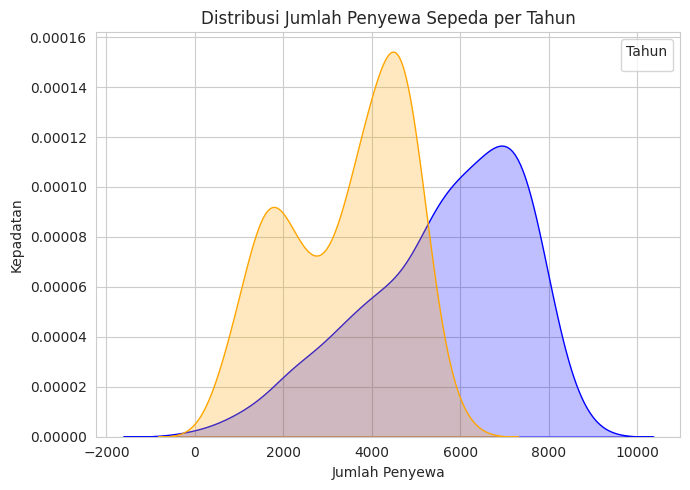

In [55]:
# Membuat visualisasi data penyewa sepeda
# Set style untuk visualisasi
sns.set_style("whitegrid")

# Membuat visualisasi distribusi data penyewa sepeda berdasarkan tahun
fig, ax = plt.subplots(figsize=(7, 5))

# Plot distribusi dengan hue berdasarkan tahun
sns.kdeplot(data=df_day, x='cnt', hue='yr', fill=True, palette=['orange', 'blue'], ax=ax)

# Menambahkan judul dan label sumbu
ax.set_title("Distribusi Jumlah Penyewa Sepeda per Tahun", fontsize=12)
ax.set_xlabel("Jumlah Penyewa", fontsize=10)
ax.set_ylabel("Kepadatan", fontsize=10)

# Menampilkan legenda dengan label tahun
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['2011', '2012'], title="Tahun", loc="upper right")

# Menampilkan plot
plt.tight_layout()
plt.show()


Dari hasil visualisasi distribusi jumlah penyewa sepeda per tahun, terlihat adanya perbedaan signifikan antara tahun 2011 dan 2012. Pada tahun 2011, distribusi penyewaan bersifat bimodal, dengan dua puncak utama di sekitar 2.000–4.000 penyewaan, menunjukkan variasi jumlah penyewa yang lebih besar. Sementara itu, pada tahun 2012, distribusi bergeser ke kanan dengan jumlah penyewaan yang lebih tinggi, berkisar antara 5.000–7.000 penyewaan per hari. Hal ini mengindikasikan peningkatan jumlah penyewaan sepeda secara keseluruhan di tahun 2012, dengan lebih banyak hari yang memiliki angka penyewaan tinggi. Selain itu, jumlah penyewaan maksimum di tahun 2012 juga lebih besar dibandingkan tahun sebelumnya, menunjukkan adanya lonjakan pengguna pada hari-hari tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apakah orang-orang lebih sering menyewa sepeda? weekend atau weekday?

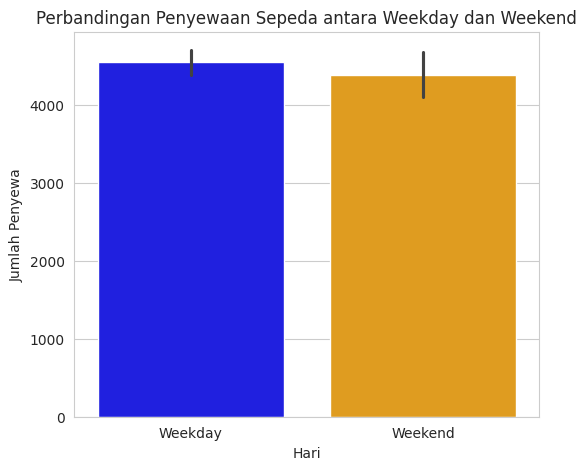

In [58]:
# Visualisasi Perbandingan Penyewaan Sepeda antara Weekday dan Weekend
plt.figure(figsize=(6, 5))

# Assuming 'is_weekend' is a column in your DataFrame with values 0 for weekday and 1 for weekend
# If 'is_weekend' column doesn't exist, create it based on your 'weekday' column
df_day['is_weekend'] = df_day['weekday'].apply(lambda day: 1 if day in ['Saturday', 'Sunday'] else 0)

sns.barplot(data=df_day, x='is_weekend', y='cnt', hue='is_weekend', palette={0: 'blue', 1: 'orange'}, legend=False)

plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Perbandingan Penyewaan Sepeda antara Weekday dan Weekend")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewa")

plt.show()

Berdasarkan analisis jumlah penyewa sepeda berdasarkan hari dalam seminggu, terlihat bahwa penyewaan cenderung lebih tinggi pada hari kerja (weekday) dibandingkan dengan akhir pekan (weekend). Hal ini kemungkinan besar disebabkan oleh penggunaan sepeda sebagai alat transportasi utama untuk bekerja atau sekolah

### Pertanyaan 2: Bagaimana perkembangan jumlah penyewa sepeda dari tahun ke tahun?

       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576


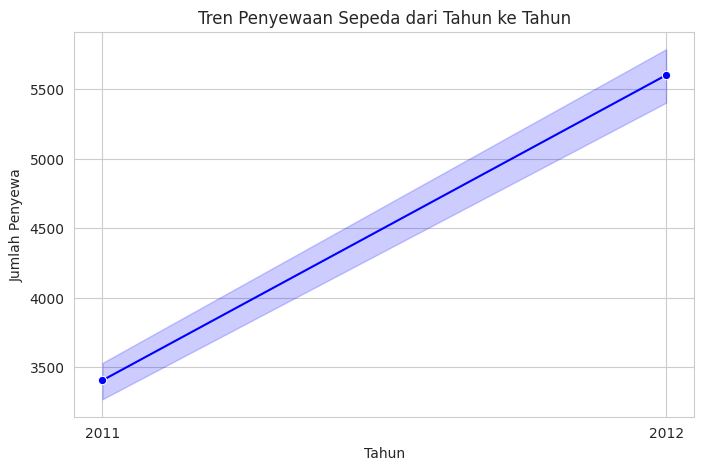

In [59]:
# Statistik penyewaan per tahun
yearly_stats = df_day.groupby('yr')['cnt'].agg(['max', 'min', 'mean', 'sum'])
print(yearly_stats)

# Visualisasi Tren Penyewaan Sepeda per Tahun
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_day, x='yr', y='cnt', marker='o', color='blue')

plt.xticks([2011, 2012])
plt.title("Tren Penyewaan Sepeda dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewa")

plt.show()


Dari analisis perkembangan jumlah penyewaan sepeda dari tahun 2011 ke 2012, terjadi peningkatan yang signifikan. Rata-rata jumlah penyewaan per hari di tahun 2012 lebih tinggi dibandingkan tahun 2011, dan nilai maksimum jumlah penyewaan juga meningkat.

### Pertanyaan 3: Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?

             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869


<ipython-input-60-d22915b8bd8d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day, x='weathersit', y='cnt', palette="coolwarm")


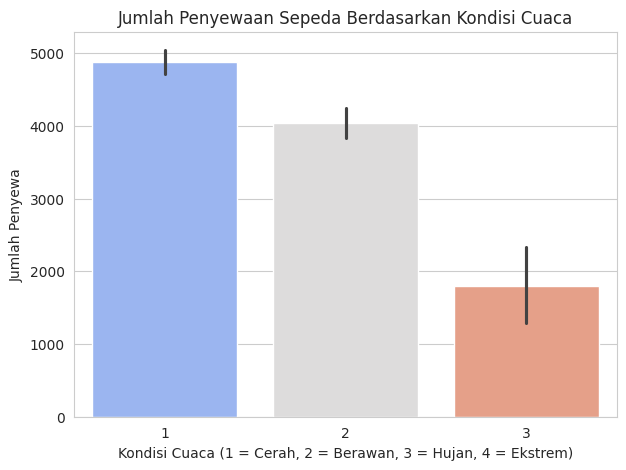

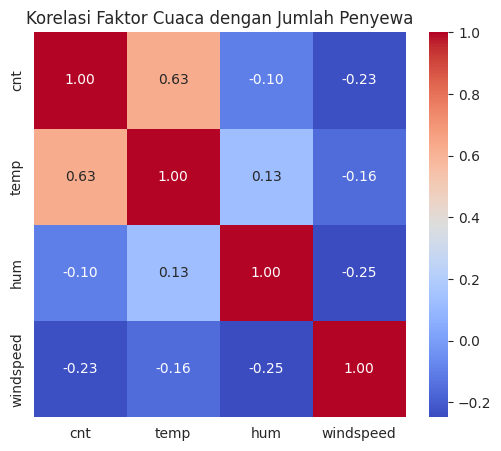

In [60]:
# Statistik penyewaan berdasarkan kondisi cuaca
weather_stats = df_day.groupby('weathersit')['cnt'].agg(['max', 'min', 'mean', 'sum'])
print(weather_stats)

# Visualisasi Perbandingan Penyewaan Berdasarkan Cuaca
plt.figure(figsize=(7, 5))
sns.barplot(data=df_day, x='weathersit', y='cnt', palette="coolwarm")

plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Berawan, 3 = Hujan, 4 = Ekstrem)")
plt.ylabel("Jumlah Penyewa")

plt.show()

# Heatmap Korelasi Cuaca dengan Penyewaan Sepeda
plt.figure(figsize=(6, 5))
sns.heatmap(df_day[['cnt', 'temp', 'hum', 'windspeed']].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Korelasi Faktor Cuaca dengan Jumlah Penyewa")

plt.show()


Berdasarkan analisis hubungan antara cuaca dan jumlah penyewa sepeda, terlihat bahwa kondisi cuaca memang berpengaruh terhadap tingkat penyewaan. Penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca cerah atau sedikit berawan, karena kondisi ini lebih nyaman untuk bersepeda. Sebaliknya, penyewaan sepeda menurun drastis saat kondisi cuaca hujan atau ekstrem (misalnya badai atau kabut tebal), karena cuaca buruk membuat bersepeda menjadi tidak nyaman dan lebih berisiko. Korelasi antara suhu dan jumlah penyewa menunjukkan bahwa saat suhu sedang (tidak terlalu panas atau dingin), jumlah penyewaan cenderung meningkat, sementara saat kelembaban tinggi atau angin kencang, jumlah penyewaan cenderung menurun.

## Analisa Tambahan

<ipython-input-61-b6975320297b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day, x='mnth', y='cnt', order=order, palette='viridis')


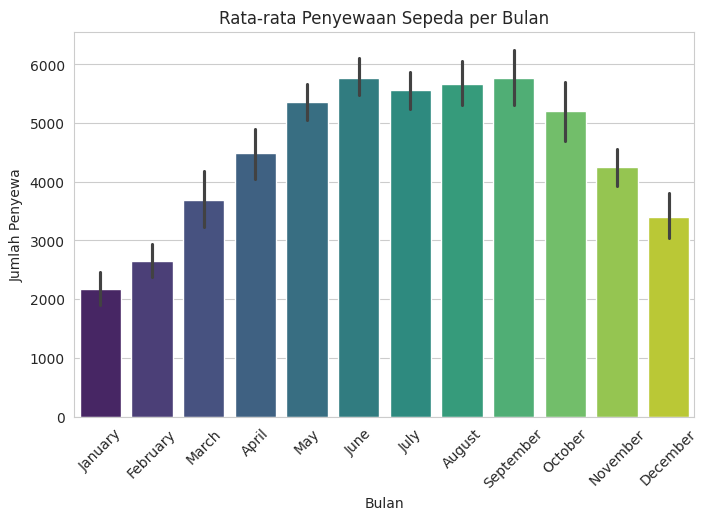

In [61]:
plt.figure(figsize=(8, 5))

# Mengurutkan bulan agar tampil berurutan
order = ["January", "February", "March", "April", "May", "June", "July",
         "August", "September", "October", "November", "December"]

sns.barplot(data=df_day, x='mnth', y='cnt', order=order, palette='viridis')

plt.xticks(rotation=45)
plt.title("Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")

plt.show()


Dari grafik ini, terlihat bahwa penyewaan sepeda mengalami peningkatan dari bulan Januari hingga mencapai puncaknya pada bulan Juni-September. Setelah itu, terjadi penurunan yang cukup signifikan mulai bulan Oktober hingga Desember. Ini menunjukkan bahwa musim panas (Summer) memiliki tingkat penyewaan yang lebih tinggi dibandingkan musim dingin (Winter), yang kemungkinan dipengaruhi oleh kondisi cuaca yang lebih mendukung untuk bersepeda.

<ipython-input-62-fd86ac6320f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day, x='weekday', y='cnt', order=order_days, palette='Blues')


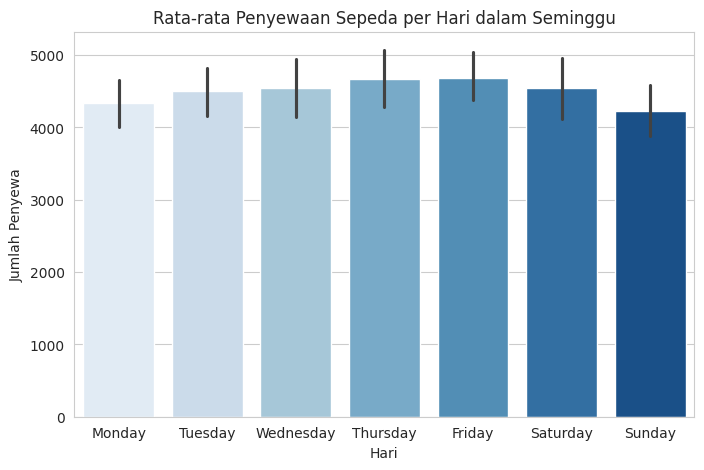

In [62]:
plt.figure(figsize=(8, 5))

# Mengurutkan nama hari agar tampil berurutan
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.barplot(data=df_day, x='weekday', y='cnt', order=order_days, palette='Blues')

plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewa")

plt.show()


Grafik ini menunjukkan bahwa penyewaan sepeda relatif stabil sepanjang minggu, dengan sedikit peningkatan pada hari kerja (weekday) dibandingkan akhir pekan (weekend). Hari Kamis dan Jumat mencatatkan angka penyewaan tertinggi, sementara hari Minggu memiliki rata-rata penyewaan lebih rendah. Hal ini bisa mengindikasikan bahwa sepeda lebih sering digunakan untuk keperluan kerja atau transportasi harian dibandingkan rekreasi di akhir pekan.

## Conclusion

1. Conclusion pertanyaan 1:
Berdasarkan analisis jumlah penyewaan sepeda pada hari kerja (weekday) dan akhir pekan (weekend), ditemukan bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja. Hal ini menunjukkan bahwa mayoritas penyewa sepeda menggunakannya sebagai alat transportasi utama untuk aktivitas sehari-hari, seperti bekerja atau sekolah, dibandingkan untuk keperluan rekreasi di akhir pekan.

2. Conclusion pertanyaan 2:
Analisis perkembangan jumlah penyewa sepeda menunjukkan adanya peningkatan signifikan dari tahun 2011 ke 2012. Jumlah penyewa rata-rata per hari meningkat dari sekitar 3.406 penyewa di 2011 menjadi 5.600 penyewa di 2012, dengan total penyewaan meningkat dari 1,24 juta menjadi 2,05 juta dalam satu tahun.

3. Conclusion pertanyaan 3:
Analisis hubungan antara kondisi cuaca dan jumlah penyewaan sepeda menunjukkan bahwa penyewaan tertinggi terjadi pada cuaca cerah, sedangkan penyewaan terendah terjadi pada cuaca ekstrem seperti hujan lebat atau badai. Hal ini menunjukkan bahwa faktor cuaca memiliki dampak besar terhadap keputusan seseorang untuk menyewa sepeda, di mana cuaca buruk cenderung mengurangi jumlah pengguna.

Kesimpulan akhir: Penyewaan sepeda lebih banyak dilakukan pada hari kerja, mengalami tren peningkatan dari tahun ke tahun, dan sangat dipengaruhi oleh kondisi cuaca.